In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install swifter

In [ ]:
!pip install emoji

In [ ]:
import pandas as pd
import numpy as np

#Progress bars
from tqdm import tqdm
tqdm.pandas()

#Paralelize pandas apply on multiple cores
import swifter

#One-hot encodding
from sklearn.preprocessing import LabelBinarizer

import matplotlib.pyplot as plt
plt.use.style('ggplot')

import emoji
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

from gensim.models import KeyedVectors


ModuleNotFoundError: ignored

# We are going to merge three datasets together : Getting_Real_about_Fake_News(big data), True, Fake.

#-  **EDA**

# **Getting_Real_about_Fake_News(big data-train).csv**

In [ ]:
fakenews_path = "/content/drive/Shareddrives/DS4A_Fakenews/data/Getting_Real_about_Fake_News(big data—train).csv"


In [ ]:
df_fakenews = pd.read_csv(fakenews_path)
df_fakenews

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12994,f1b5d0e44803f48732bde854a9fdf95837219b12,2,replaceme,2016-10-26T23:58:00.000+03:00,NaN,It DOES allow you to put a dog face on top of ...,english,2016-10-27T00:37:46.194+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.000,NaN,40,32,0,0,0,bs
12995,36011ceba3647e1bea78299b68b6fb705a1fc1ad,3,Freedumb,2016-10-27T00:02:00.000+03:00,NaN,Wait till you see what happens to the valuatio...,english,2016-10-27T00:37:46.220+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.000,NaN,40,32,0,0,0,bs
12996,6995d1aa9ac99926106489b14b5530e85358059a,4,major major maj...,2016-10-27T00:06:00.000+03:00,NaN,I'm waiting for the one that puts a pussy on m...,english,2016-10-27T00:37:46.244+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.000,NaN,40,32,0,0,0,bs
12997,7de8ae90eee164eb756db6c8a3772288e11d7a94,5,beemasters,2016-10-27T00:09:00.000+03:00,NaN,$4 Billion even after they are known to be kee...,english,2016-10-27T00:37:46.247+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.000,NaN,40,32,0,0,0,bs


In [ ]:
df_fakenews.columns

Index(['uuid', 'ord_in_thread', 'author', 'published', 'title', 'text',
       'language', 'crawled', 'site_url', 'country', 'domain_rank',
       'thread_title', 'spam_score', 'main_img_url', 'replies_count',
       'participants_count', 'likes', 'comments', 'shares', 'type'],
      dtype='object')

In [ ]:
df_fakenews.shape

(12999, 20)

In [ ]:
df_fakenews["type"].value_counts()

bs            11492
bias            443
conspiracy      430
hate            246
satire          146
state           121
junksci         102
fake             19
Name: type, dtype: int64

"Data sources that were missing a label were simply assigned a label of "bs". There are (ostensibly) no genuine, reliable, or trustworthy news sources represented in this dataset (so far), so don't trust anything you read."

So we will drop the data labeled as "bs".



In [ ]:
df_fakenews = df_fakenews[df_fakenews["type"] != "bs"]
df_fakenews["type"].value_counts()

bias          443
conspiracy    430
hate          246
satire        146
state         121
junksci       102
fake           19
Name: type, dtype: int64

In [ ]:
df_fakenews["language"].value_counts()

english    1503
ignore        3
french        1
Name: language, dtype: int64

We drop data that is not written in english

In [ ]:
df_fakenews = df_fakenews[df_fakenews["language"] == "english"]

In [ ]:
df_fakenews = df_fakenews[["title", "text", "type"]]

In [ ]:
df_fakenews.head()

,title,text,type
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,bias
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,bias
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,bias
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,bias
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,bias


types with "conspiracy", "hate", "satire", "state", "junksci" are all labeled as "fake"

In [ ]:
df_fakenews["type"].replace("conspiracy", "fake", inplace=True)
df_fakenews["type"].replace("hate", "fake", inplace=True)
df_fakenews["type"].replace("satire", "fake", inplace=True)
df_fakenews["type"].replace("state", "fake", inplace=True)
df_fakenews["type"].replace("junksci", "fake", inplace=True)

In [ ]:
df_fakenews["type"].value_counts()

fake    1060
bias     443
Name: type, dtype: int64

# **Fake.csv**

In [ ]:
onlyfake_path = "/content/drive/Shareddrives/DS4A_Fakenews/data/True or False/Fake.csv"

In [ ]:
df_onlyfake = pd.read_csv(onlyfake_path)

In [ ]:
df_onlyfake.shape

(23481, 4)

In [ ]:
df_onlyfake["type"] = "fake"
df_onlyfake.head()

,title,text,subject,date,type
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [ ]:
df_onlyfake = df_onlyfake[["title", "text", "type"]]
df_onlyfake.head()

,title,text,type
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,fake


# **True.csv**

In [ ]:
onlytrue_path = "/content/drive/Shareddrives/DS4A_Fakenews/data/True or False/True.csv"

In [ ]:
df_onlytrue = pd.read_csv(onlytrue_path)
df_onlytrue.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
df_onlytrue["type"] = "true"
df_onlytrue = df_onlytrue[["title", "text", "type"]]
df_onlytrue.head()

,title,text,type
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,true


# Merge three datasets

In [ ]:
# https://www.skytowner.com/explore/concatenating_dataframes_vertically_in_pandas_dataframe

df_news = pd.concat([df_fakenews, df_onlyfake, df_onlytrue], ignore_index=True)
df_news

,title,text,type
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,bias
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,bias
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,bias
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,bias
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,bias
...,...,...,...
46396,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,true
46397,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",true
46398,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,true
46399,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,true


In [ ]:
df_news["type"].value_counts()

fake    24541
true    21417
bias      443
Name: type, dtype: int64

# - **Data Preprocessing**

The following websites introduces how to do Text Preprocessing.<br>
https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/ <br>
https://www.analyticsvidhya.com/blog/2023/02/tackling-fake-news-with-machine-learning/

# Lowering the Text, Removing Punctuation and Digits, Removing Stop Words

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://pythonspot.com/nltk-stop-words/

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Load the pre-trained word vectors
model = KeyedVectors.load_word2vec_format("/content/drive/Shareddrives/DS4A_Fakenews/data/GoogleNews-vectors-negative300.bin",
                                          binary=True, limit=50000)

In [ ]:
embed_mat = np.zeros((50000,300))
for i in model.index_to_key:
    embed_mat[model.key_to_index[i]] = model[i]


In [ ]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # checks if the input text is a float.
    # If it is, the function returns an empty string. Otherwise, it proceeds with the preprocessing steps.
    if isinstance(text, float):
        return ''

    # Lowercase the text
    text = str(text).lower()

    # Remove emojis
    text = emoji.demojize(text)
    text = text.replace(":", "")

    # Remove punctuation and digits
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words
    words = [word for word in words if word not in stop_words]

    # Filter words based on KeyedVectors model vocabulary
    words = [word for word in words if word in model.key_to_index]

    # Join the words back into a string
    text = ' '.join(words)

    return text


In [ ]:
# Apply preprocessing to the 'text' column
df_news['clean_text'] = df_news['text'].apply(preprocess_text)

In [ ]:
# Apply preprocessing to the 'title' column
df_news['title'] = df_news['title'].apply(preprocess_text)

In [ ]:
df_news.head()

,title,text,type,clean_text
0,busted stole millions gov benefits,Print They should pay all the back all the mon...,bias,print pay back money plus interest entire fami...
1,attorney general plead fifth,Why Did Attorney General Loretta Lynch Plead T...,bias,attorney general plead fifth brigade print adm...
2,breaking cooperating email investigation,Red State : \nFox News Sunday reported this mo...,bias,red state fox news reported morning cooperatin...
3,pin drop speech father daughter kidnapped kill...,Email Kayla Mueller was a prisoner and torture...,bias,email prisoner tortured chance horrific story ...
4,fantastic trumps point plan reform healthcare ...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,bias,email healthcare reform make great since march...


## Most common 10 words for every type content(fake, true, bias) (EDA)

In [ ]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# most common 20 words in fake content
corpus_text = [preprocess_text(i).split() for i in df_news[df_news['type'] == 'fake']['clean_text'].tolist()]
corpus_text = [item for sublist in corpus_text for item in sublist]
corpus_text = [w.lower().strip() for w in corpus_text if w.lower().strip() not in stop_words]
c = Counter(corpus_text)
most_common_fake_content = c.most_common(20)

# most common 20 words in true content
corpus_text = [preprocess_text(i).split() for i in df_news[df_news['type'] == 'true']['clean_text'].tolist()]
corpus_text = [item for sublist in corpus_text for item in sublist]
corpus_text = [w.lower().strip() for w in corpus_text if w.lower().strip() not in stop_words]
c = Counter(corpus_text)
most_common_true_content = c.most_common(20)

# most common 20 words in bias content
corpus_text = [preprocess_text(i).split() for i in df_news[df_news['type'] == 'bias']['clean_text'].tolist()]
corpus_text = [item for sublist in corpus_text for item in sublist]
corpus_text = [w.lower().strip() for w in corpus_text if w.lower().strip() not in stop_words]
c = Counter(corpus_text)
most_common_bias_content = c.most_common(20)


print('Fake news content - most common words:', most_common_fake_content)
print('True news content - most common words:', most_common_true_content)
print('Bias news content - most common words:', most_common_bias_content)



Fake news content - most common words: [('trump', 75260), ('said', 32009), ('people', 27208), ('president', 26165), ('would', 24512), ('one', 24260), ('us', 23204), ('like', 18504), ('also', 16262), ('new', 14829), ('news', 14562), ('even', 14494), ('time', 13426), ('state', 13195), ('white', 13119), ('media', 11579), ('get', 11356), ('via', 11322), ('campaign', 11079), ('house', 10859)]
True news content - most common words: [('said', 99042), ('trump', 54268), ('us', 41154), ('would', 31525), ('president', 26454), ('state', 19766), ('government', 18317), ('new', 16786), ('states', 16630), ('house', 16548), ('also', 15953), ('united', 15574), ('republican', 15348), ('people', 15255), ('told', 14244), ('could', 13710), ('one', 12703), ('last', 12614), ('party', 12457), ('two', 11624)]
Bias news content - most common words: [('trump', 1516), ('said', 491), ('election', 395), ('one', 345), ('would', 344), ('campaign', 338), ('people', 332), ('new', 259), ('president', 257), ('also', 239),

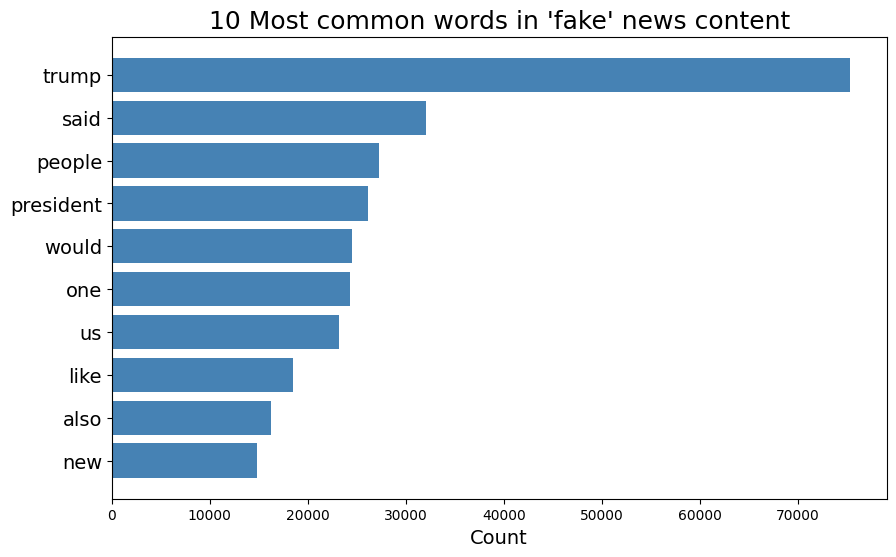

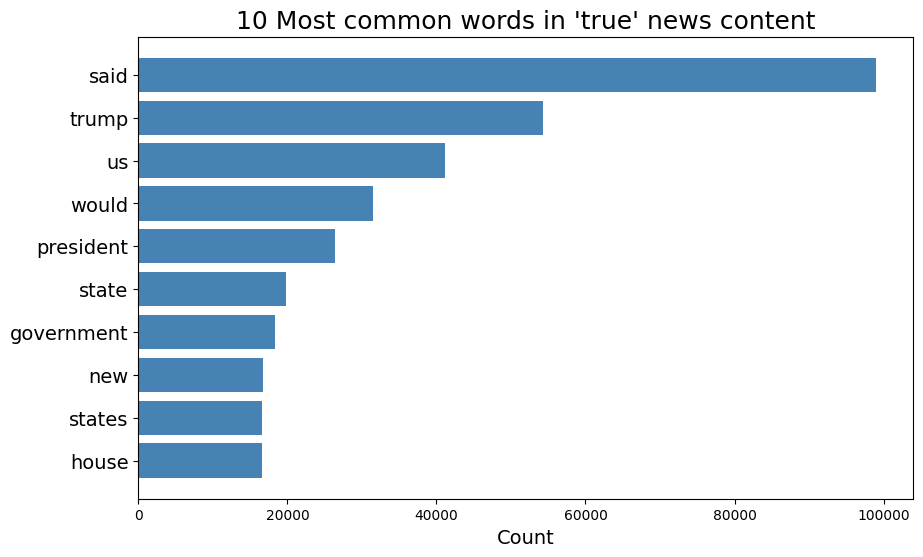

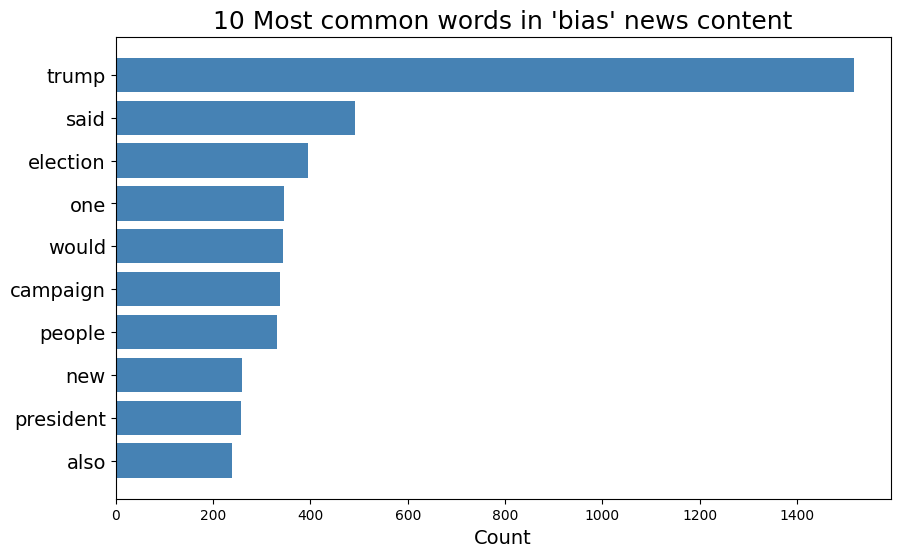

In [ ]:
import matplotlib.pyplot as plt

# Define titles and variables for each type of news content
names = ["10 Most common words in 'fake' news content", "10 Most common words in 'true' news content", "10 Most common words in 'bias' news content"]
variables = [most_common_fake_content, most_common_true_content, most_common_bias_content]

# Generate a chart for each type of news content
for title, var in zip(names, variables):
    fig, ax = plt.subplots(figsize=(10,6))

    words = [item[0] for item in var[:10]] # Extract the top 10 most common words
    counts = [item[1] for item in var[:10]] # Extract the counts of the top 10 most common words

    ax.barh(words, counts, color='steelblue') # Create a bar chart
    ax.invert_yaxis() # Invert the y-axis, so the most common word is on top
    plt.tick_params(axis='y', which='major', labelsize=14) # Set the y-axis tick size
    plt.title(title, fontsize=18) # Set the chart title and size
    plt.xlabel('Count', fontsize=14) # Set the x-axis label and size
    plt.show() # Display the chart


## **trigrams for each type of news content:**
a trigram would be a sequence of three words. we're generating the most common trigrams for each type of news content, which can give us insights into the differences in language use between 'fake', 'true', and 'bias' news.








In [ ]:

# Generate trigrams for 'fake' news content
corpus_text = [' '.join(preprocess_text(i).split()) for i in df_news[df_news['type'] == 'fake']['clean_text'].tolist()]
c_vec = CountVectorizer(ngram_range=(3,3))
ngrams = c_vec.fit_transform(corpus_text)
vocab = c_vec.vocabulary_
count_values = ngrams.toarray().sum(axis=0)
ngrams_fake = {}
for ng_count, ng_text in sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)[:30]:
    ngrams_fake[ng_text] = ng_count

# Generate trigrams for 'true' news content
corpus_text = [' '.join(preprocess_text(i).split()) for i in df_news[df_news['type'] == 'true']['clean_text'].tolist()]
c_vec = CountVectorizer(ngram_range=(3,3))
ngrams = c_vec.fit_transform(corpus_text)
vocab = c_vec.vocabulary_
count_values = ngrams.toarray().sum(axis=0)
ngrams_true = {}
for ng_count, ng_text in sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)[:30]:
    ngrams_true[ng_text] = ng_count

# Generate trigrams for 'bias' news content
corpus_text = [' '.join(preprocess_text(i).split()) for i in df_news[df_news['type'] == 'bias']['clean_text'].tolist()]
c_vec = CountVectorizer(ngram_range=(3,3))
ngrams = c_vec.fit_transform(corpus_text)
vocab = c_vec.vocabulary_
count_values = ngrams.toarray().sum(axis=0)
ngrams_bias = {}
for ng_count, ng_text in sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)[:30]:
    ngrams_bias[ng_text] = ng_count

# Print trigrams for news content
print("TRIGRAMS FAKE")
print(ngrams_fake)
print("TRIGRAMS TRUE")
print(ngrams_true)
print("TRIGRAMS BIAS")
print(ngrams_bias)


NameError: ignored

In [ ]:
import matplotlib.pyplot as plt

# Titles for the plots
names = ["10 Most common tri-grams in Bias news", "10 Most common tri-grams in Fake news", "10 Most common tri-grams in True news"]

# Variables to iterate over
variables = [ngrams_bias, ngrams_fake, ngrams_true]

# Loop over each variable and create a horizontal bar plot for the top 10 trigrams
for title, var in zip(names, variables):
    fig, ax = plt.subplots(figsize=(14,8))

    # Get the top 10 trigrams
    top_trigrams = list(var.items())[:10]

    # Get the trigram phrases and their counts
    phrases = [item[0] for item in top_trigrams]
    counts = [item[1] for item in top_trigrams]

    # Create a horizontal bar plot
    ax.barh(phrases, counts)

    # Invert the y-axis so the highest value is at the top
    ax.invert_yaxis()

    # Set the y-axis label size
    plt.tick_params(axis='y', which='major', labelsize=14)

    # Set the title of the plot
    plt.title(title, fontsize=18)

    # Show the plot
    plt.show()


# **WordCloud (EDA)**

In [ ]:
from wordcloud import WordCloud


# Create a subplot with 3 rows and 1 column, and set the figure size
fig, ax = plt.subplots(3, 1, figsize=(16, 16))

# Word cloud for 'fake' news
corpus_text = ' '.join(df_news[df_news['type'] == 'fake']['clean_text'].tolist())
wordcloud = WordCloud(stopwords=stop_words, scale=7, collocations=False).generate(corpus_text)
ax[0].imshow(wordcloud, interpolation='bilinear')
ax[0].axis("off")
ax[0].set_title("WordCloud for 'fake' news", fontsize=18)

# Word cloud for 'bias' news
corpus_text = ' '.join(df_news[df_news['type'] == 'bias']['clean_text'].tolist())
wordcloud = WordCloud(stopwords=stop_words, scale=7, collocations=False).generate(corpus_text)
ax[1].imshow(wordcloud, interpolation='bilinear')
ax[1].axis("off")
ax[1].set_title("WordCloud for 'bias' news", fontsize=18)

# Word cloud for 'true' news
corpus_text = ' '.join(df_news[df_news['type'] == 'true']['clean_text'].tolist())
wordcloud = WordCloud(stopwords=stop_words, scale=7, collocations=False).generate(corpus_text)
ax[2].imshow(wordcloud, interpolation='bilinear')
ax[2].axis("off")
ax[2].set_title("WordCloud for 'true' news", fontsize=18)

# Adjust the layout of the plot
plt.tight_layout()
plt.show()


# **Vectorization**

In [ ]:
# Tokenize the 'clean_text' column using the loaded model
df_news["vectorized_clean_text"] = df_news.progress_apply(lambda r: [model.key_to_index[word]
                                                 for word in word_tokenize(str(r["clean_text"]))
                                                 if word in model.key_to_index], axis=1)

In [ ]:
# Tokenize the 'title' column using the loaded model
df_news["vectorized_title"] = df_news.progress_apply(lambda r: [model.key_to_index[word]
                                                 for word in word_tokenize(str(r["title"]))
                                                 if word in model.key_to_index], axis=1)

In [ ]:
df_news.head()

In [ ]:
# Filter out rows with empty titles
df_news = df_news[df_news["vectorized_title"].map(len) >= 1]

# Reset index
df_news = df_news.reset_index().drop("index", axis=1)

In [ ]:
df_news

In [ ]:
def pad_array(array, token_len):
    '''
    Parameters:
        array: The input array that needs to be padded or truncated.
        token_len: The desired length of the array after padding or truncation.
    Return value:
        The function returns the padded or truncated array.
    '''
    diff_token = token_len - len(array)
    if diff_token < 0:
        array = array[:token_len]  # Truncate
    else:
        # Pad
        array += [0] * diff_token  # Pad

    return array

In [ ]:
tokens_numbers = df_news.swifter.apply(lambda row: len(row["vectorized_clean_text"]), axis = 1)

fig, ax = plt.subplots(1, 1, figsize=(16, 6))
tokens_numbers.plot.hist(title="Number of tokens in the article's text", bins=50, ax=ax)
plt.show()

In [ ]:
print("Mean number of tokens per article: {}".format(int(np.mean(tokens_numbers))))
print("Standard deviation of tokens per article: {}".format(int(np.std(tokens_numbers))))
print("Median of tokens per article: {}".format(int(np.median(tokens_numbers))))


In [ ]:
max_tokens = int(np.mean(tokens_numbers) + 2 * np.std(tokens_numbers))

percent_tokens = df_news[df_news["vectorized_clean_text"].apply(len) <= max_tokens].shape[0] / df_news.shape[0]
print("Chosen token window: {} - Covers {}% of the dataset".format(max_tokens, percent_tokens * 100))

Chosen token window: 523

This indicates that the maximum number of tokens considered for each article is set to 523. The token window size represents the desired length for the sequences in the 'content' column after padding or truncation.

Covers 97.24035095301898% of the dataset

This percentage indicates the proportion of articles in the dataset that have a token count less than or equal to the chosen token window size. In this case, approximately 97.24% of the articles fall within the specified token window size of 523.

In [ ]:
max_len_text = max_tokens
df_news["vectorized_clean_text"] = df_news.apply(lambda r: pad_array(r["vectorized_clean_text"], max_len_text) , axis=1)

Do the same for the title

In [ ]:
tokens_numbers = df_news.swifter.apply(lambda row: len(row["vectorized_title"]), axis = 1)

fig, ax = plt.subplots(1, 1, figsize=(16, 6))
tokens_numbers.plot.hist(title="Number of tokens in the article's title", bins=30, ax=ax)
plt.show()

In [ ]:
print("Mean number of tokens in the title per article: {}".format(int(np.mean(tokens_numbers))))
print("Standard deviation of tokens in the title per article: {}".format(int(np.std(tokens_numbers))))
print("Median of tokens in the title per article: {}".format(int(np.median(tokens_numbers))))
max_tokens = int(np.mean(tokens_numbers) + 2 * np.std(tokens_numbers))

percent_tokens = df_news[df_news["vectorized_title"].apply(len) <= max_tokens].shape[0] / df_news.shape[0]
print("Chosen token window: {} - Covers {}% of the dataset".format(max_tokens, percent_tokens * 100))

In [ ]:
max_len_title = max_tokens
df_news["vectorized_title"] = df_news.apply(lambda r: pad_array(r["vectorized_title"], max_len_title) , axis=1)

# **Classify the type's Label by One-hot encoding**

In [ ]:
encoder = LabelBinarizer().fit(list(df_news["type"]))
df_news["one_hot_label"] = df_news.apply(lambda r: encoder.transform([r['type']])[0], axis=1)
df_news.head()

In [ ]:
print("LABELS")
enc = encoder.transform(encoder.classes_)
for x, y in zip(encoder.classes_, enc):
    print(x, y)

In [ ]:
df_news.to_csv("/content/drive/Shareddrives/DS4A_Fakenews/data/clean_data/clean_news.csv", encoding='utf-8', index=False)
df_news.to_pickle("/content/drive/Shareddrives/DS4A_Fakenews/data/clean_data/clean_news.pickle")

In [ ]:
df_news["type"].value_counts()

In [ ]:
label_counts = df_news['one_hot_label'].apply(tuple).value_counts()
print(label_counts)


In [ ]:
len_text = len(df_news["vectorized_clean_text"][1000])
len_title = len(df_news['vectorized_title'][1000])

print("Max len content: {}".format(len_text))
print("Max len title: {}".format(len_title))